觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
Eg

    計算任意欄位的平均數及標準差
    畫出任意欄位的直方圖

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/Part01/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_career_amt = pd.DataFrame(app_train[['NAME_INCOME_TYPE','AMT_ANNUITY']])#取出年收和職業映射出一個子集

In [9]:
df_career_amt.shape#觀察欄位變化

(307511, 2)

In [5]:
df_career = pd.get_dummies(df_career_amt['NAME_INCOME_TYPE'])#取出職業 並扁平化

In [6]:
df_career.shape#觀察欄位變化

(307511, 8)

In [7]:
df_career.head()#觀察欄位變化

,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [10]:
df_career['Commercial associate'].sum()#從事零售業的總人數

71617

In [11]:
df_career['Pensioner'].sum()#領退休金的總人數

55362

In [12]:
df_career_amt['AMT_ANNUITY'].mean()#年收平均數

27108.573909183444

In [13]:
df_career_amt['AMT_ANNUITY'].std()#年收標準差

14493.737315118333

In [15]:
df_career_amt.info()#觀察內容 發現欄位不匹配 八成有非數字的東西混進去了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
NAME_INCOME_TYPE    307511 non-null object
AMT_ANNUITY         307499 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.7+ MB


In [14]:
df_career_amt_num_only = df_career_amt[np.isfinite(df_career_amt['AMT_ANNUITY'])]#去除非數字的筆數 避免計算出錯

In [16]:
df_career_amt_num_only.info()#再度觀察 已經去除

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 2 columns):
NAME_INCOME_TYPE    307499 non-null object
AMT_ANNUITY         307499 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.0+ MB


In [17]:
df_career_group = df_career_amt_num_only.groupby("NAME_INCOME_TYPE")#使用職業分組 觀察各職業從業人數
df_career_group.size()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71614
Maternity leave              5
Pensioner                55362
State servant            21700
Student                     18
Unemployed                  22
Working                 158768
dtype: int64

In [18]:
list(df_career.columns.values) #將職業組裝成一個list 之後將做為直方圖的X軸

['Businessman',
 'Commercial associate',
 'Maternity leave',
 'Pensioner',
 'State servant',
 'Student',
 'Unemployed',
 'Working']

In [19]:
list_amt_annual = []#存放各職業平均年收的list 

for career in list(df_career.columns.values):#遍歷各職業 當做索引值
    list_amt_annual.append(df_career_group.get_group(career).mean()['AMT_ANNUITY'])#計算各職業的年均收入 並放入list_amt_annual

In [20]:
nparray_amt_annual = np.asarray(list_amt_annual)#將list轉為nparray

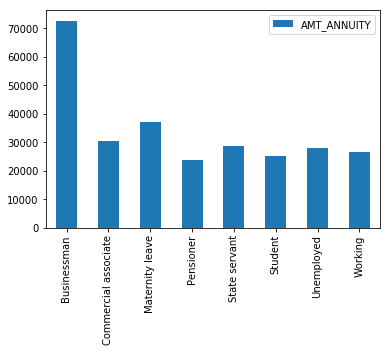

In [22]:
df_histogram = pd.DataFrame(nparray_amt_annual, list(df_career.columns.values), columns=pd.Index(['AMT_ANNUITY']))
df_histogram.plot(kind='bar')    #印圖